In [ ]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

import os

c:\Users\rishe\anaconda3\envs\py311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [ ]:
cwd = os.getcwd()
cwd = '/'.join(cwd.split('/')[:-1])

file_path = 'datasets/observed_rent_index_co.pkl' 
df = pd.read_pickle(os.path.join(cwd,file_path))

df

C:\Users\rishe\AppData\Local\Temp\ipykernel_28872\2441948270.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start=start, freq=freq, periods=periods)
12:45:48 - cmdstanpy - INFO - Chain [1] start processing
12:45:49 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\rishe\anaconda3\envs\py311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


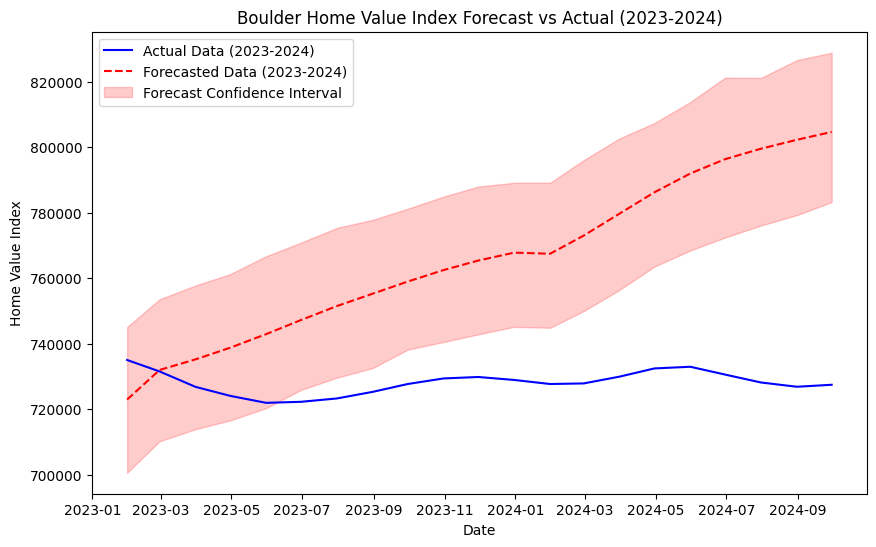

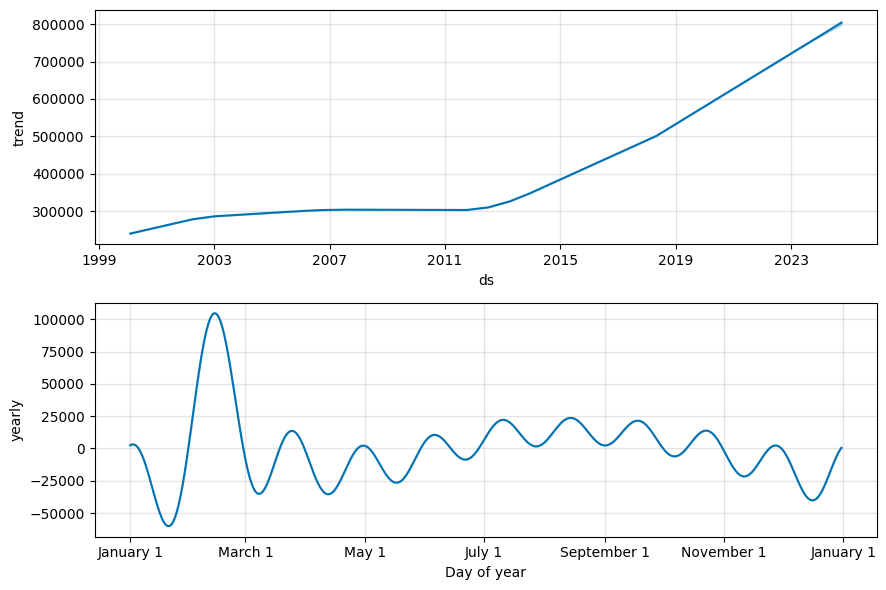

Forecast data (2023-2024):
            ds           yhat     yhat_lower     yhat_upper
276 2023-01-31  722966.723448  700638.560912  745116.894950
277 2023-02-28  731994.438423  710223.458619  753566.027820
278 2023-03-31  735229.734537  713925.450806  757779.439652
279 2023-04-30  738792.583219  716613.867908  761265.556659
280 2023-05-31  742938.039252  720352.328106  766717.340488
281 2023-06-30  747231.467231  725905.667681  770853.087563
282 2023-07-31  751493.282151  729644.210397  775345.306826
283 2023-08-31  755286.715420  732575.538705  777821.660675
284 2023-09-30  758956.205508  738188.563778  781180.787554
285 2023-10-31  762472.994736  740523.856552  784891.740774
286 2023-11-30  765389.533893  742863.694765  787954.887933
287 2023-12-31  767805.104499  745150.868851  789113.852241
288 2024-01-31  767466.993355  744874.582955  789132.678853
289 2024-02-29  773001.868470  749966.165806  796049.013432
290 2024-03-31  779719.131211  756452.605942  802672.880911
291 2024-04-3

In [3]:
from prophet import Prophet 
import pandas as pd 
import matplotlib.pyplot as plt

def create_date_range(start='2000-01-31', end='2023-12-31', freq='M', periods=None):
    """ 
    Create a DatetimeIndex with enhanced flexibility 
     
    Parameters: 
    -----------
    start : str, datetime, optional 
        Start date of the range (default: '2000-01-31') 
    end : str, datetime, optional 
        End date of the range (default: '2023-12-31') 
    freq : str, optional 
        Frequency of the date range (default: 'M' for month end) 
        Common frequencies: 
        - 'D': calendar day 
        - 'B': business day 
        - 'W': weekly 
        - 'M': month end 
        - 'Q': quarter end 
        - 'Y': year end 
    periods : int, optional 
        Number of periods to generate if end is not specified 
     
    Returns: 
    -------- 
    pd.DatetimeIndex 
        A DatetimeIndex with specified parameters 
    """ 
    try: 
        if periods: 
            # Use periods and start, don't specify end 
            date_range = pd.date_range(start=start, freq=freq, periods=periods) 
        else: 
            # Use start and end, don't specify periods 
            date_range = pd.date_range(start=start, end=end, freq=freq) 
        return date_range 
    except Exception as e: 
        print(f"Error creating date range: {e}") 
        return None

def forecast_home_values(file_path='datasets/home_value_index_co.pkl', region='Boulder'):
    # Read the pickle file
    df = pd.read_pickle(file_path)
    
    # Filter data for the specific region
    boulder_data = df[df['RegionName'] == region]['home_value_index'].values[0]
    
    # Create date range for historical data (up to December 2023)
    date_range = create_date_range(start='2000-01-31', end='2023-12-31', freq='M', periods=len(boulder_data))
    
    # Convert Boulder data into a pandas DataFrame for Prophet
    df_boulder = pd.DataFrame({
        'ds': date_range,  # Generated date range
        'y': boulder_data 
    })
    
    # Split data for training (up to 2022) and testing (2023)
    train_data = df_boulder[df_boulder['ds'] < '2023-01-01']
    
    # Initialize and fit Prophet model
    model = Prophet()
    model.fit(train_data)
    
    # Create a dataframe for future dates (2023-09)
    future = model.make_future_dataframe(periods=21, freq='M')  # Forecast for 21 months (2023-2024)
    
    # Make predictions
    forecast = model.predict(future)
    
    # Test data for the period 2023-2024
    test_data = df_boulder[df_boulder['ds'] >= '2023-01-01']
    
    # Filter the forecast data to show only 2023-2024 period
    forecast_2023_2024 = forecast[forecast['ds'] >= '2023-01-01']
    
    # Plot forecast vs actual test data for 2023 and 2024 (up to September)
    plt.figure(figsize=(10, 6))
    
    # Actual data from test period (2023-2024)
    plt.plot(test_data['ds'], test_data['y'], label='Actual Data (2023-2024)', color='blue')  # Actual data
    
    # Forecasted data (2023-2024)
    plt.plot(forecast_2023_2024['ds'], forecast_2023_2024['yhat'], label='Forecasted Data (2023-2024)', color='red', linestyle='dashed')  # Forecasted data
    
    # Confidence Interval
    plt.fill_between(forecast_2023_2024['ds'], forecast_2023_2024['yhat_lower'], forecast_2023_2024['yhat_upper'], color='red', alpha=0.2, label='Forecast Confidence Interval')  # Confidence interval
    
    # Titles and labels
    plt.title(f'{region} Home Value Index Forecast vs Actual (2023-2024)')
    plt.xlabel('Date')
    plt.ylabel('Home Value Index')
    
    # Add legend
    plt.legend()  # Show legend to differentiate actual and forecasted data
    plt.show()
    
    # Plot model components (seasonality, trend, etc.)
    fig_components = model.plot_components(forecast)
    plt.show()
    
    # Print the forecasted data for 2023-2024
    print("Forecast data (2023-2024):")
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(21))
    
    # Calculate accuracy metrics
    def calculate_accuracy(original, forecast):
        # Align forecast with test data (2023-2024)
        test_forecast = forecast[forecast['ds'] >= '2023-01-01']
        
        # Mean Absolute Percentage Error (MAPE)
        mape = abs((original - test_forecast['yhat']) / original).mean() * 100
        
        # Mean Absolute Error (MAE)
        mae = abs(original - test_forecast['yhat']).mean()
        
        # Root Mean Squared Error (RMSE)
        rmse = ((original - test_forecast['yhat'])**2).mean()**0.5
        
        return {
            'MAPE': mape,
            'MAE': mae,
            'RMSE': rmse
        }
    
    # Use 2023-2024 data for testing accuracy
    accuracy_metrics = calculate_accuracy(test_data['y'], forecast)
    
    print("\nAccuracy Metrics:")
    for metric, value in accuracy_metrics.items():
        print(f"{metric}: {value}")
    
    return model, forecast, accuracy_metrics

# Example usage
model, forecast, accuracy = forecast_home_values()
